In [1]:
import torch
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import scipy.io as io
import scipy.sparse as sparse
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import h5py
import seaborn as sns
import copy
import scipy as sp
import tangram as tg

In [2]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg

In [3]:
#read in dataset
ad_sp = sc.read_h5ad('/Users/f006gs0/Downloads/spatial_00hrs.h5ad')
ad_sc = sc.read_h5ad('/Users/f006gs0/Downloads/alldata.filt.00hrs.h5ad')

In [8]:
ad_sp.obs

fov      volume        min_x  \
10195234023986061748759418868131632556   1049  332.823696  1303.086249   
102335307297430978533246897821968614362  1049   71.437181  1223.931066   
104772610428114248427360866823893796969  1049  441.912976  1308.091029   
105125581704933533952695363779738075052  1049  119.444545  1351.282658   
106311542262791922682886080676412930251  1049  134.717181  1345.759169   
...                                       ...         ...          ...   
88216362233098582260312481062191729018   1182   73.832416  1444.372853   
93176952243691881971123176900356197054   1182  135.478163  1471.245243   
95238681949075550972194839380429899369   1182  157.085197  1467.722166   
244056141356542698473869219139671863928  1183   70.171836  1559.675114   
51950068033282707180999093014562325555   1187  120.671134  2451.870140   

                                               max_x        min_y  \
10195234023986061748759418868131632556   1312.837514  2846.759155   
102335307297430978533246897821968614362  1230.662756  2817.981229   
104772610428114248427360866823893796969  1318.256729  2841.820819   
105125581704933533952695363779738075052  1363.895838  2911.046754   
106311542262791922682886080676412930251  1354.730468  2874.492105   
...                                              ...          ...   
88216362233098582260312481062191729018   1452.430027  1185.680006   
93176952243691881971123176900356197054   1483.065919  1185.026374   
95238681949075550972194839380429899369   1478.055279  1184.913469   
244056141356542698473869219139671863928  1568.805756  1182.780181   
51950068033282707180999093014562325555   2461.232100  1099.872444   

                                               max_y  ExpressionCounts  \
10195234023986061748759418868131632556   2855.738602             144.0   
102335307297430978533246897821968614362  2823.961197              25.0   
104772610428114248427360866823893796969  2853.482043             161.0   
105125581704933533952695363779738075052  2918.444185              38.0   
106311542262791922682886080676412930251  2881.604496              35.0   
...                                              ...               ...   
88216362233098582260312481062191729018   1190.602644              15.0   
93176952243691881971123176900356197054   1191.873349              44.0   
95238681949075550972194839380429899369   1192.056365              49.0   
244056141356542698473869219139671863928  1188.850023              24.0   
51950068033282707180999093014562325555   1109.400855              23.0   

                                         n_counts leiden  
10195234023986061748759418868131632556      144.0     14  
102335307297430978533246897821968614362      25.0     17  
104772610428114248427360866823893796969     161.0      4  
105125581704933533952695363779738075052      38.0     10  
106311542262791922682886080676412930251      35.0      2  
...                                           ...    ...  
88216362233098582260312481062191729018       15.0      9  
93176952243691881971123176900356197054       44.0      9  
95238681949075550972194839380429899369       49.0      9  
244056141356542698473869219139671863928      24.0      9  
51950068033282707180999093014562325555       23.0     10  

[39191 rows x 9 columns]

In [7]:
ad_sc.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
0h_ABC_AAACCCAAGCTCTGTA-1      0_ABC     57883.0          8038    7.252561   
0h_ABC_AAACCCACAGAAATCA-1      0_ABC     30722.0          6132    5.019204   
0h_ABC_AAACCCATCATCGCCT-1      0_ABC     13263.0          4282    3.181784   
0h_ABC_AAACGAAAGTTGCGCC-1      0_ABC     38300.0          7070    5.563969   
0h_ABC_AAACGAAAGTTTCTTC-1      0_ABC     12442.0          3652    5.626105   
...                              ...         ...           ...         ...   
0h_DEF_TTTGTTGCAGGACTTT-1      0_DEF     10692.0          3572    5.546203   
0h_DEF_TTTGTTGCATTACGGT-1      0_DEF      9947.0          3512    6.162662   
0h_DEF_TTTGTTGTCAACCGAT-1      0_DEF     18802.0          5025    7.323689   
0h_DEF_TTTGTTGTCCACACCT-1      0_DEF     21544.0          5888    3.560156   
0h_DEF_TTTGTTGTCTTGCGCT-1      0_DEF     32929.0          6599    5.001670   

                           percent_mito  percent_ribo  RNA_snn_res.0.1  \
0h_ABC_AAACCCAAGCTCTGTA-1      7.252561           0.0                0   
0h_ABC_AAACCCACAGAAATCA-1      5.019204           0.0                0   
0h_ABC_AAACCCATCATCGCCT-1      3.181784           0.0                1   
0h_ABC_AAACGAAAGTTGCGCC-1      5.563969           0.0                3   
0h_ABC_AAACGAAAGTTTCTTC-1      5.626105           0.0                0   
...                                 ...           ...              ...   
0h_DEF_TTTGTTGCAGGACTTT-1      5.546203           0.0                3   
0h_DEF_TTTGTTGCATTACGGT-1      6.162662           0.0                5   
0h_DEF_TTTGTTGTCAACCGAT-1      7.323689           0.0                0   
0h_DEF_TTTGTTGTCCACACCT-1      3.560156           0.0                8   
0h_DEF_TTTGTTGTCTTGCGCT-1      5.001670           0.0                0   

                           seurat_clusters  pANN_0.25_0.09_1390  \
0h_ABC_AAACCCAAGCTCTGTA-1                0             0.284173   
0h_ABC_AAACCCACAGAAATCA-1                0             0.253297   
0h_ABC_AAACCCATCATCGCCT-1                5             0.202038   
0h_ABC_AAACGAAAGTTGCGCC-1                2             0.313549   
0h_ABC_AAACGAAAGTTTCTTC-1                0             0.165767   
...                                    ...                  ...   
0h_DEF_TTTGTTGCAGGACTTT-1                2             0.202338   
0h_DEF_TTTGTTGCATTACGGT-1                9             0.277278   
0h_DEF_TTTGTTGTCAACCGAT-1                6             0.244305   
0h_DEF_TTTGTTGTCCACACCT-1               12             0.358813   
0h_DEF_TTTGTTGTCTTGCGCT-1                6             0.251799   

                          DF.classifications_0.25_0.09_1390  test_res.0.5  \
0h_ABC_AAACCCAAGCTCTGTA-1                           Singlet             0   
0h_ABC_AAACCCACAGAAATCA-1                           Singlet             0   
0h_ABC_AAACCCATCATCGCCT-1                           Singlet            11   
0h_ABC_AAACGAAAGTTGCGCC-1                           Singlet             8   
0h_ABC_AAACGAAAGTTTCTTC-1                           Singlet             0   
...                                                     ...           ...   
0h_DEF_TTTGTTGCAGGACTTT-1                           Singlet             8   
0h_DEF_TTTGTTGCATTACGGT-1                           Singlet            15   
0h_DEF_TTTGTTGTCAACCGAT-1                           Singlet            12   
0h_DEF_TTTGTTGTCCACACCT-1                           Singlet             4   
0h_DEF_TTTGTTGTCTTGCGCT-1                           Singlet            12   

                          timepoints  timep woo woo1 final_cluster final_abbr  \
0h_ABC_AAACCCAAGCTCTGTA-1      00hrs    0.0   0    0             0          0   
0h_ABC_AAACCCACAGAAATCA-1      00hrs    0.0   0    0             0          0   
0h_ABC_AAACCCATCATCGCCT-1      00hrs    0.0   5    5             5          5   
0h_ABC_AAACGAAAGTTGCGCC-1      00hrs    0.0   2    2             2          2   
0h_ABC_AAACGAAAGTTTCTTC-1      00hrs    0.0   0    0             

In [ ]:
#for some reason the ff_names are being weird.
#lets remap it into cell type names. 

cell_type_mapping = {
    '0': 'meiotic',
                                                     '5': 'Stroma early',
                                                     '2': 'Large Anstral Granulosa',
                                                     '13': 'Granulosa/Stroma',
                                                     '12': 'Myeloid/Macrophage',
                                                     '8': 'Small Luteal',
                                                     '14_0': 'Epithelial',
                                                     '9': 'Steroidogenic Theca (early)',
                                                     '11': 'Endothelial',
                                                     '6': 'Preantral Granulosa',
                                                     '14_1': 'Epithelial/Endothelial',
                                                     '15': 'Oocyte',
                                                     '14_2': 'Stroma late',
                                                     '14_4': 'Steroidogenic Theca late',
                                                     '1': 'COC Expansion Early',
                                                     '7': 'large luteal',
                                                     '3': 'COC Expansion Late',
                                                     '14_3': 'Epithelial',
                                                     '4': 'Epithelial',
                                                     '10': 'Epithelial'}


ad_sc.obs['cell_type'] = [cell_type_mapping[value] for value in ad_sc.obs['woo1']]

In [12]:
tg.pp_adatas(ad_sc, ad_sp, genes=None)

INFO:root:198 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:198 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [13]:
ad_map = tg.map_cells_to_space(ad_sc, ad_sp)
#this single step took me ~8hrs. and honestly this is the only one that is taking so long. 

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 198 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: -0.020, KL reg: 0.018
Score: 0.662, KL reg: 0.006
Score: 0.697, KL reg: 0.005
Score: 0.706, KL reg: 0.004
Score: 0.711, KL reg: 0.004
Score: 0.713, KL reg: 0.004
Score: 0.715, KL reg: 0.004
Score: 0.716, KL reg: 0.004
Score: 0.717, KL reg: 0.004
Score: 0.718, KL reg: 0.004


INFO:root:Saving results..


In [30]:
ad_map.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
12_ABC_AAACCCAAGAACTGAT-1     12_ABC     11132.0          3236    3.988502   
12_ABC_AAACCCACAATGACCT-1     12_ABC     11259.0          3792    4.822808   
12_ABC_AAACCCAGTGATCATC-1     12_ABC     60033.0          8030    5.796812   
12_ABC_AAACCCAGTTTGGGAG-1     12_ABC      9566.0          3463    5.822705   
12_ABC_AAACGAAAGCAAACAT-1     12_ABC     17772.0          4556    7.185460   
...                              ...         ...           ...         ...   
12_DEF_TTTGGTTTCTATTGTC-1     12_DEF     25822.0          5395    3.551235   
12_DEF_TTTGTTGCAGCTGTCG-1     12_DEF      9754.0          3664    5.279885   
12_DEF_TTTGTTGGTGAGATCG-1     12_DEF     23983.0          5477    4.503190   
12_DEF_TTTGTTGGTGGCTCTG-1     12_DEF     16934.0          4592    3.430967   
12_DEF_TTTGTTGTCACGTCCT-1     12_DEF     17158.0          4475    2.611027   

                           percent_mito  percent_ribo  RNA_snn_res.0.1  \
12_ABC_AAACCCAAGAACTGAT-1      3.988502           0.0                0   
12_ABC_AAACCCACAATGACCT-1      4.822808           0.0                1   
12_ABC_AAACCCAGTGATCATC-1      5.796812           0.0                0   
12_ABC_AAACCCAGTTTGGGAG-1      5.822705           0.0                9   
12_ABC_AAACGAAAGCAAACAT-1      7.185460           0.0                5   
...                                 ...           ...              ...   
12_DEF_TTTGGTTTCTATTGTC-1      3.551235           0.0                2   
12_DEF_TTTGTTGCAGCTGTCG-1      5.279885           0.0                8   
12_DEF_TTTGTTGGTGAGATCG-1      4.503190           0.0                2   
12_DEF_TTTGTTGGTGGCTCTG-1      3.430967           0.0                0   
12_DEF_TTTGTTGTCACGTCCT-1      2.611027           0.0                2   

                           seurat_clusters  pANN_0.25_0.09_1390  \
12_ABC_AAACCCAAGAACTGAT-1                0             0.174760   
12_ABC_AAACCCACAATGACCT-1                1             0.213129   
12_ABC_AAACCCAGTGATCATC-1                0             0.398381   
12_ABC_AAACCCAGTTTGGGAG-1               14             0.248201   
12_ABC_AAACGAAAGCAAACAT-1                9             0.311151   
...                                    ...                  ...   
12_DEF_TTTGGTTTCTATTGTC-1                4             0.263489   
12_DEF_TTTGTTGCAGCTGTCG-1               12             0.234113   
12_DEF_TTTGTTGGTGAGATCG-1                4             0.367506   
12_DEF_TTTGTTGGTGGCTCTG-1               13             0.293165   
12_DEF_TTTGTTGTCACGTCCT-1                4             0.243705   

                          DF.classifications_0.25_0.09_1390  test_res.0.5  \
12_ABC_AAACCCAAGAACTGAT-1                           Singlet             0   
12_ABC_AAACCCACAATGACCT-1                           Singlet             1   
12_ABC_AAACCCAGTGATCATC-1                           Singlet             0   
12_ABC_AAACCCAGTTTGGGAG-1                           Singlet             6   
12_ABC_AAACGAAAGCAAACAT-1                           Singlet            15   
...                                                     ...           ...   
12_DEF_TTTGGTTTCTATTGTC-1                           Singlet            10   
12_DEF_TTTGTTGCAGCTGTCG-1                           Singlet             4   
12_DEF_TTTGTTGGTGAGATCG-1                           Singlet            10   
12_DEF_TTTGTTGGTGGCTCTG-1                           Singlet             5   
12_DEF_TTTGTTGTCACGTCCT-1                           Singlet            10   

                          timepoints  timep   woo  woo1 final_cluster  \
12_ABC_AAACCCAAGAACTGAT-1      12hrs   12.0     0     0             0   
12_ABC_AAACCCACAATGACCT-1      12hrs   12.0     1     1             1   
12_ABC_AAACCCAGTGATCATC-1      12hrs   12.0     0     0             0   
12_ABC_AAACCCAGTTTGGGAG-1      12hrs   12.0    14  14_0          14_0   
12_ABC_AAACGAAAGCAAACAT-1      12hrs   12.0     9     9             9   
...                             

In [31]:
tg.project_cell_annotations(ad_map, ad_sp, annotation="cell_type")
#Here I still have not tried your code for visualizing the cells LOL. Feel free to add that part. 

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


In [35]:
annotation_list = list(pd.unique(ad_sc.obs['cell_type']))

In [48]:
ad_map

AnnData object with n_obs × n_vars = 10269 × 52980
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent_mito', 'percent_ribo', 'RNA_snn_res.0.1', 'seurat_clusters', 'pANN_0.25_0.09_1390', 'DF.classifications_0.25_0.09_1390', 'test_res.0.5', 'timepoints', 'timep', 'woo', 'woo1', 'final_cluster', 'final_abbr', 'ff_names', 'orig.ident2', 'cell_type'
    var: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts', 'n_counts', 'leiden', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

In [46]:
ad_sp.obsm['tangram_ct_pred']

meiotic  COC Expansion Early  \
142239694008826425870598529961971733060  0.016502             0.021081   
156496055044123368112581532430428700130  0.018516             0.031727   
170147117900539217990504369575563685609  0.026537             0.060123   
245018205818407725393608124847300514411  0.010554             0.014685   
248766121147733953446397701086224357294  0.018138             0.059551   
...                                           ...                  ...   
29262040266309565977330069786517739433   0.022964             0.034334   
42989839927821851744966915443932768944   0.053012             0.065262   
58946784743266084206672030774357118710   0.010015             0.019689   
66033117609143321899003727465638023282   0.011590             0.072951   
76024018905289447585697993269427778791   0.031189             0.053010   

                                         Epithelial  \
142239694008826425870598529961971733060    0.032807   
156496055044123368112581532430428700130    0.041510   
170147117900539217990504369575563685609    0.083810   
245018205818407725393608124847300514411    0.054083   
248766121147733953446397701086224357294    0.067799   
...                                             ...   
29262040266309565977330069786517739433     0.064207   
42989839927821851744966915443932768944     0.076072   
58946784743266084206672030774357118710     0.079094   
66033117609143321899003727465638023282     0.076104   
76024018905289447585697993269427778791     0.066787   

                                         Steroidogenic Theca (early)  \
142239694008826425870598529961971733060                     0.000002   
156496055044123368112581532430428700130                     0.000002   
170147117900539217990504369575563685609                     0.000003   
245018205818407725393608124847300514411                     0.000002   
248766121147733953446397701086224357294                     0.000002   
...                                                              ...   
29262040266309565977330069786517739433                      0.000004   
42989839927821851744966915443932768944                      0.000006   
58946784743266084206672030774357118710                      0.000001   
66033117609143321899003727465638023282                      0.000015   
76024018905289447585697993269427778791                      0.000003   

                                         Myeloid/Macrophage  large luteal  \
142239694008826425870598529961971733060            0.000027      0.013473   
156496055044123368112581532430428700130            0.001646      0.018004   
170147117900539217990504369575563685609            0.000042      0.018332   
245018205818407725393608124847300514411            0.000038      0.019676   
248766121147733953446397701086224357294            0.000040      0.034226   
...                                                     ...           ...   
29262040266309565977330069786517739433             0.005907      0.021554   
42989839927821851744966915443932768944             0.003622      0.046007   
58946784743266084206672030774357118710             0.000028      0.000116   
66033117609143321899003727465638023282             0.005227      0.017475   
76024018905289447585697993269427778791             0.000031      0.047555   

                                         Endothelial    Oocyte  \
142239694008826425870598529961971733060     0.004176  0.000008   
156496055044123368112581532430428700130     0.002356  0.000010   
170147117900539217990504369575563685609     0.003476  0.000012   
245018205818407725393608124847300514411     0.000069  0.000011   
248766121147733953446397701086224357294     0.000076  0.000011   
...                                              ...       ...   
29262040266309565977330069786517739433      0.009498  0.000008   
42989839927821851744966915443932768944      0.003840  0.001256   
58946784743266084206672030774357118710      0.000042  0.000008   
66033117609143321899003727465638023282    

In [16]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=ad_sc)
ad_ge

AnnData object with n_obs × n_vars = 52980 × 25630
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts', 'n_counts', 'leiden', 'uniform_density', 'rna_count_based_density'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'sparsity', 'is_training'
    uns: 'training_genes', 'overlap_genes'

In [56]:
ad_ge.obsm['spatial'] = ad_sp.obsm['spatial']

In [91]:
ad_ge.write("integration_00hrs.h5ad")

In [2]:
ad_ge = sc.read_h5ad('/Users/f006gs0/Downloads/integration_00hrs.h5ad')

In [ ]:
#below you can ignore. Those are easy to run. 

In [3]:
sq.gr.spatial_neighbors(ad_ge1, coord_type="generic", spatial_key="spatial")
sq.gr.spatial_autocorr(ad_ge1, mode="moran")
num_view = 12
top_autocorr = ad_ge1.uns['moranI']['I'].sort_values(ascending=False).head(num_view).index.tolist()
bot_autocorr = ad_ge1.uns['moranI']['I'].sort_values(ascending=True).head(num_view).index.tolist()

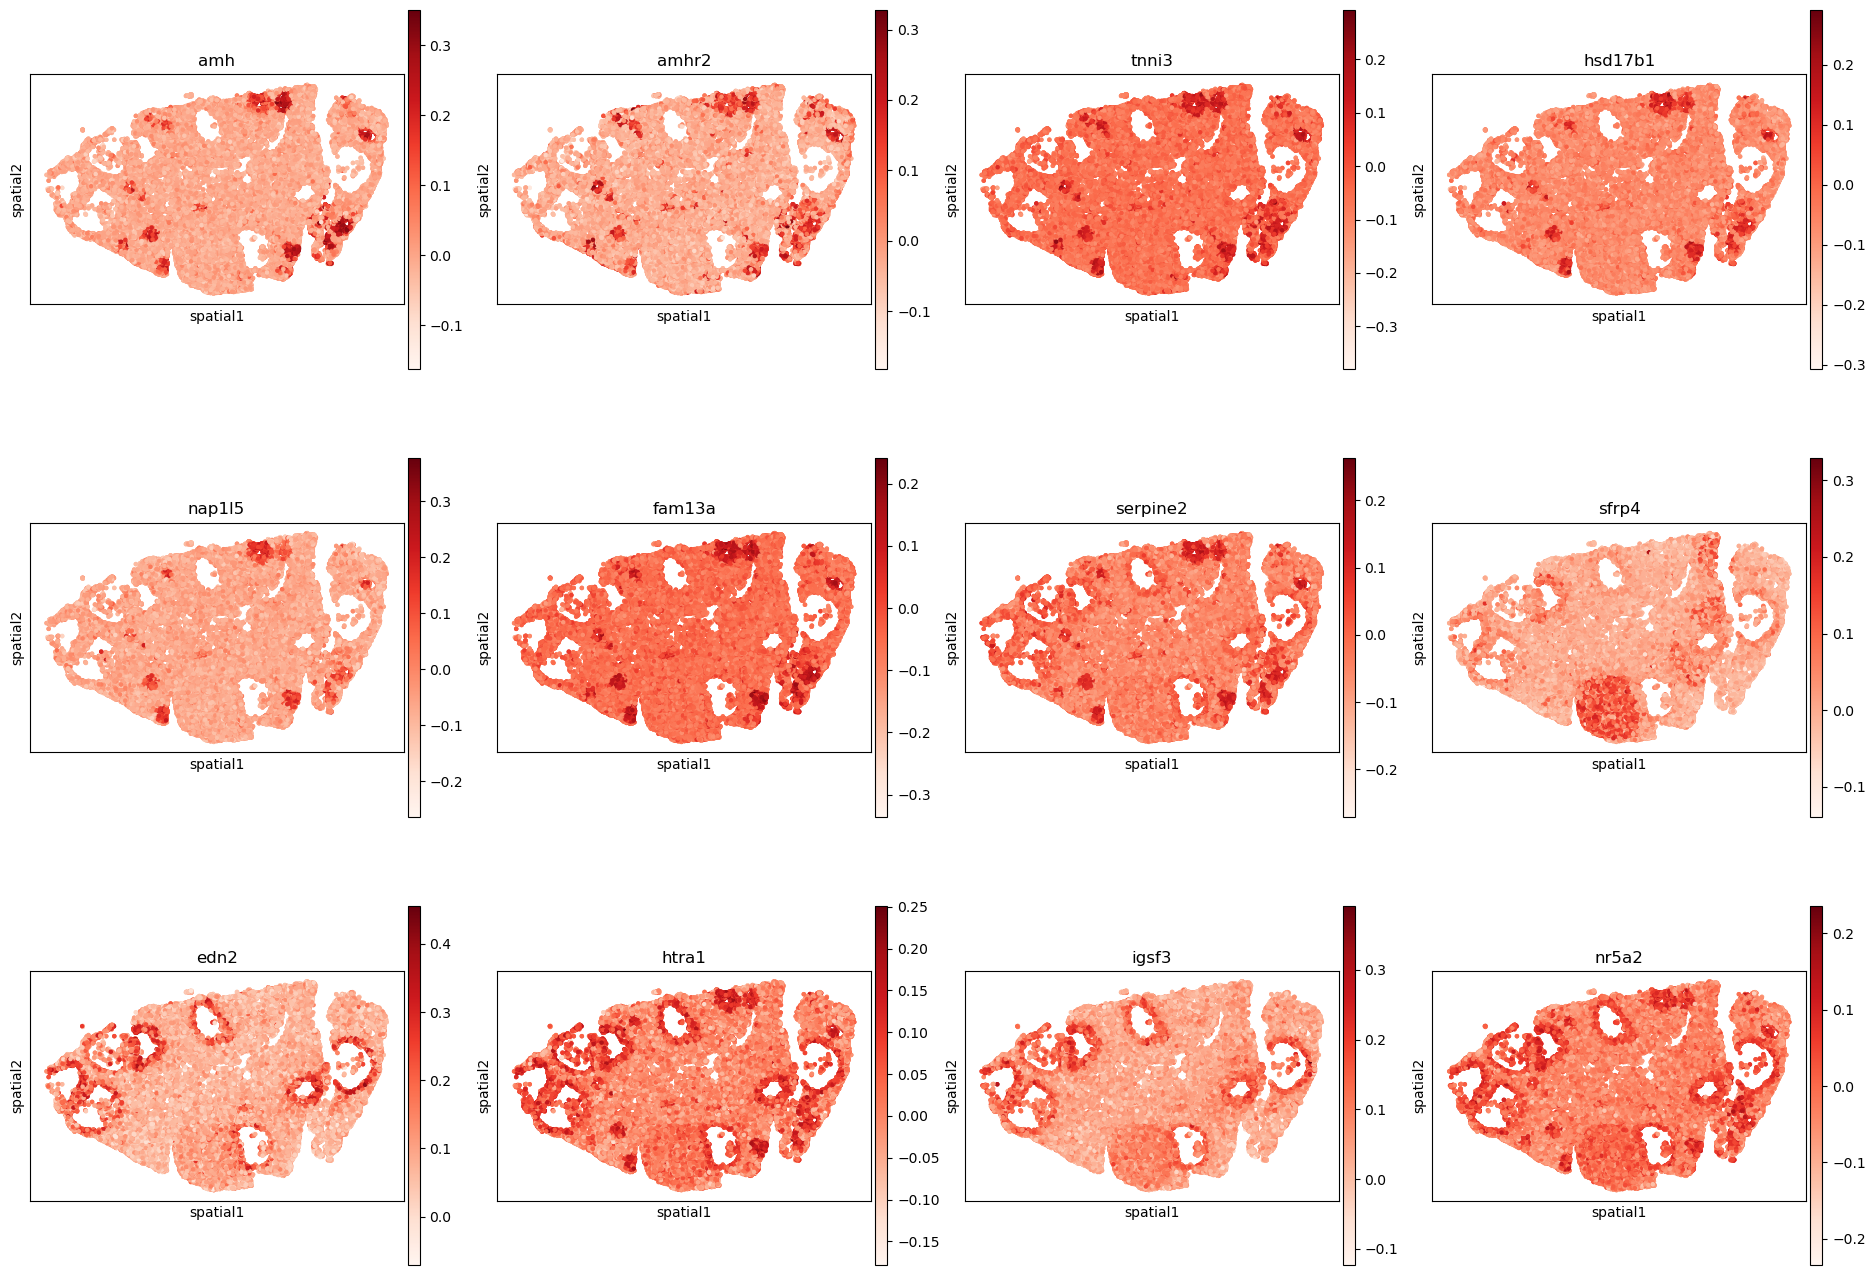

In [4]:
sq.pl.spatial_scatter(
    ad_ge1,
    color=top_autocorr,
    size=20,
    cmap='Reds',
    img=False,
    figsize=(5,5),
    shape = None,
    library_id='spatial',
)

In [8]:
ad_ge1.uns['moranI']['I'].sort_values(ascending=False).head(25)#.index.tolist()

amh         0.710954
amhr2       0.626042
tnni3       0.604229
hsd17b1     0.603107
nap1l5      0.591176
fam13a      0.587897
serpine2    0.585888
sfrp4       0.583609
edn2        0.563177
htra1       0.555133
igsf3       0.551872
nr5a2       0.549554
prkg2       0.547415
adamts1     0.547390
st3gal5     0.544308
tanc2       0.543585
gm2a        0.542366
parm1       0.539570
inha        0.538320
tenm4       0.535325
krt19       0.532354
slc18a2     0.532334
ephx2       0.531774
rgcc        0.526763
upk3b       0.525520
Name: I, dtype: float64

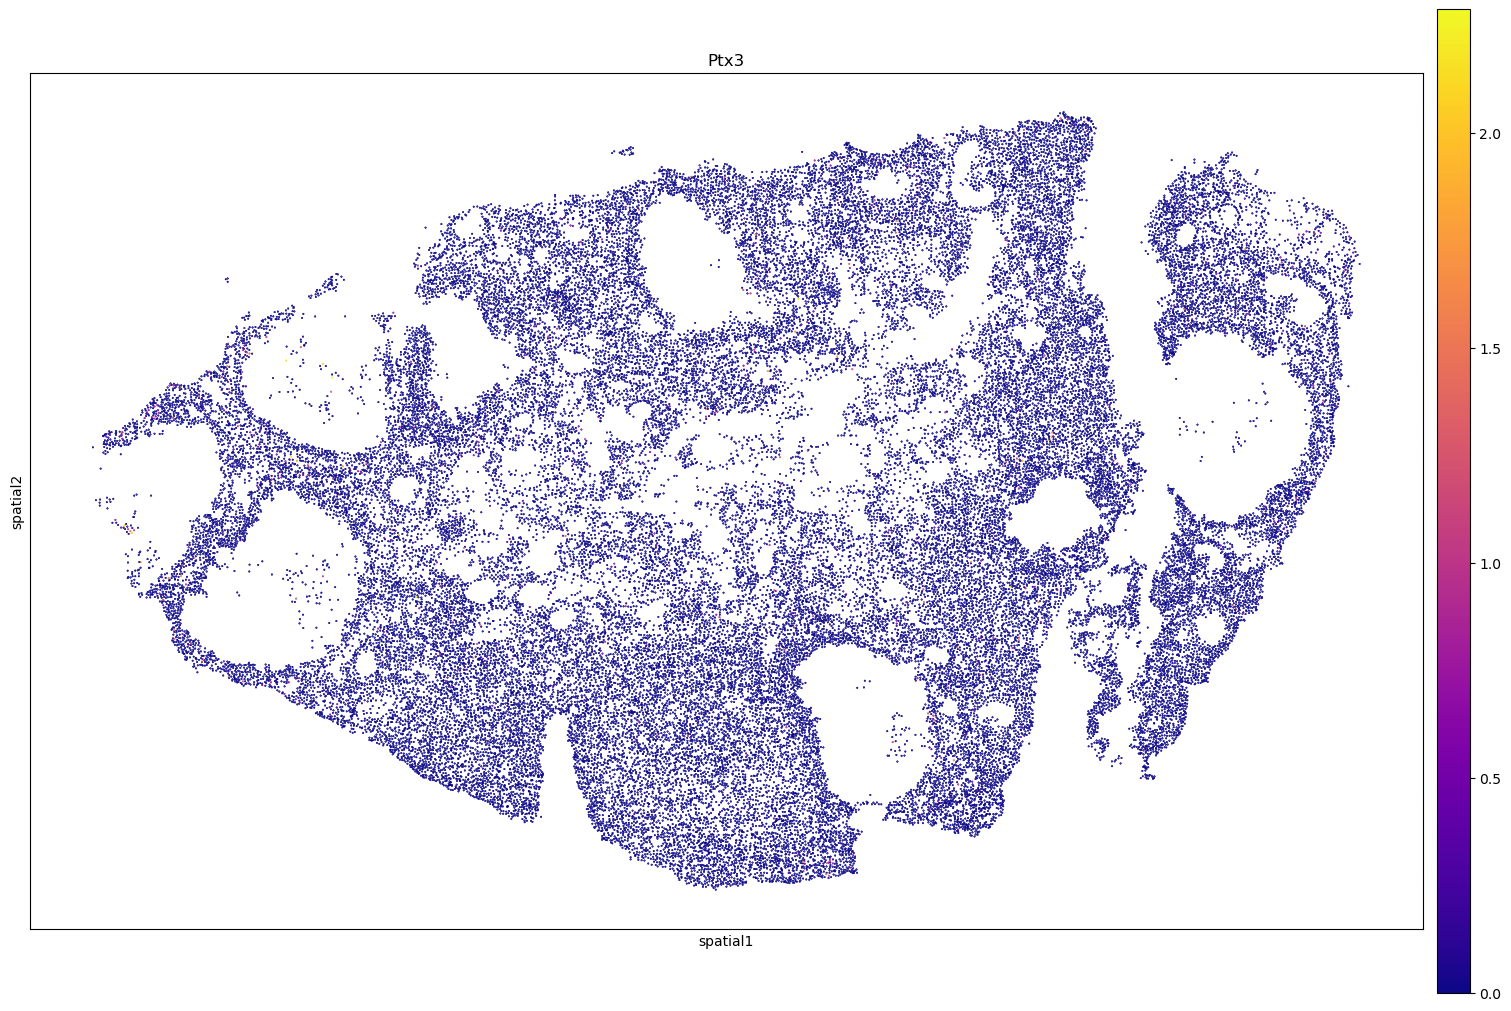

In [68]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Ptx3",
    size=0.5,
    library_id='spatial',
    figsize=(15, 10),
    cmap = 'plasma',
)

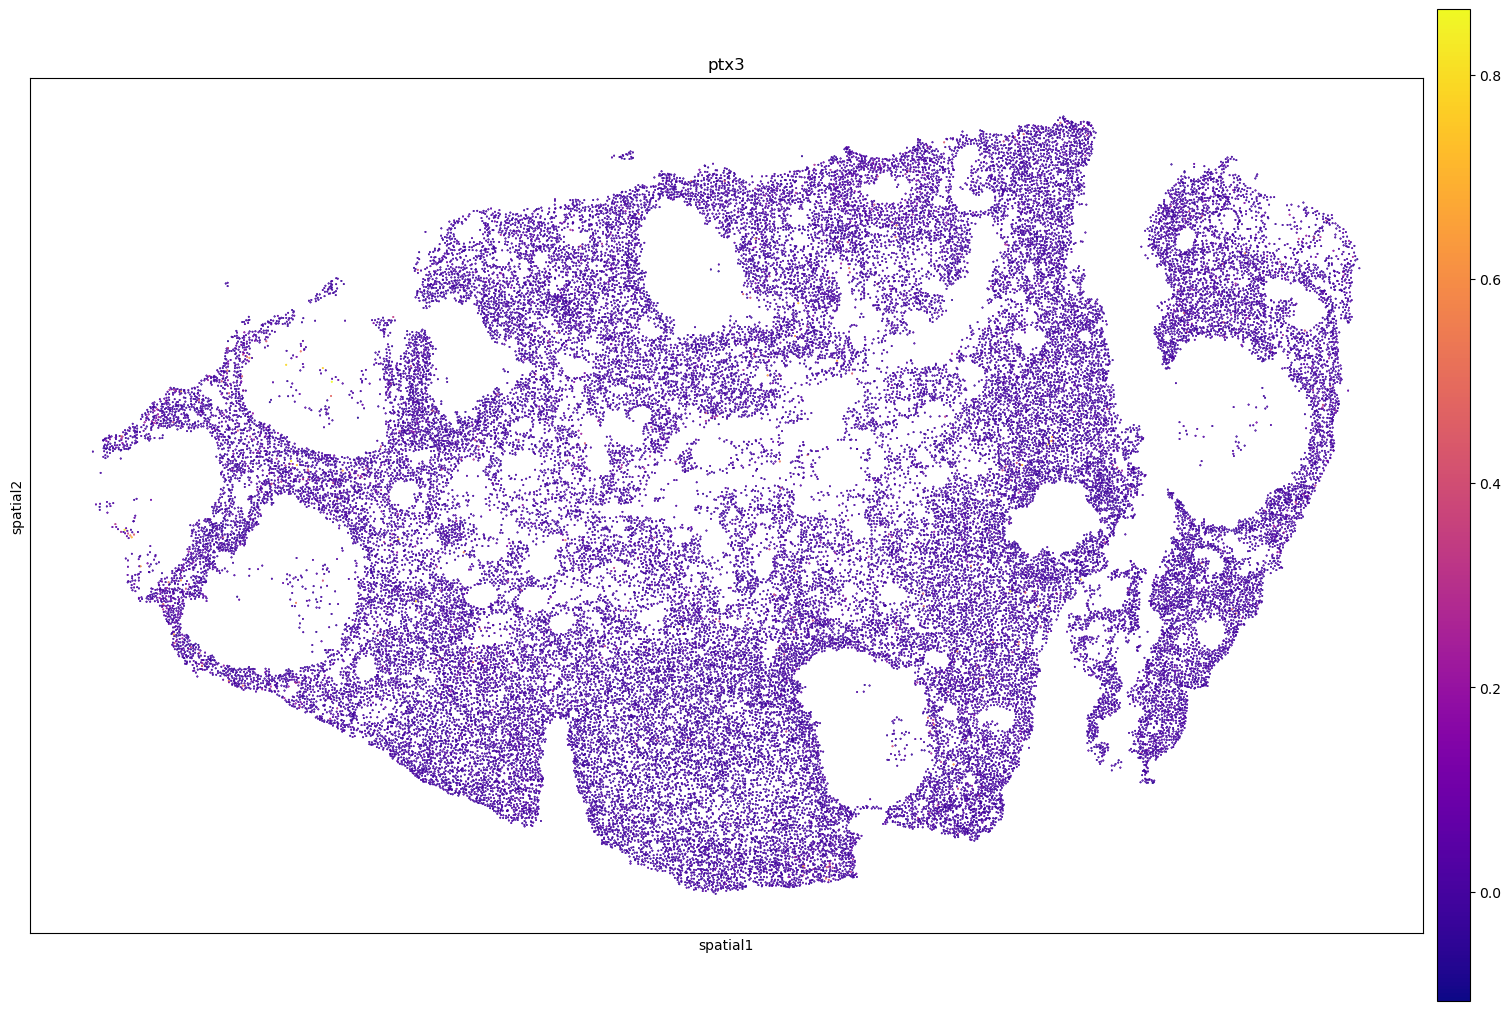

In [69]:
sq.pl.spatial_scatter(
    ad_ge1,
    shape=None,
    color="ptx3",
    size=0.5,
    library_id='spatial',
    figsize=(15, 10),
    cmap = 'plasma',
)

In [20]:
ad_ge1

AnnData object with n_obs × n_vars = 52980 × 25630
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts', 'n_counts', 'leiden', 'uniform_density', 'rna_count_based_density'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'sparsity', 'is_training'
    uns: 'overlap_genes', 'training_genes', 'spatial_neighbors', 'moranI'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [21]:
adata

AnnData object with n_obs × n_vars = 52980 × 198
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts', 'n_counts', 'leiden'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'blank_genes', 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [ ]:
tg.project_cell_annotations(ad_map, adata_st, annotation="cell_subclass")
annotation_list = list(pd.unique(adata_sc.obs['cell_subclass']))
tg.plot_cell_annotation_sc(adata_st, annotation_list,perc=0.02)

In [54]:
cType = 'large luteal'
inds_c = np.where(ad_sc.obs['ff_names'] == cType)
plt.scatter(ad_sp.obsm['spatial'][:,0],ad_sp.obsm['spatial'][:,1],np.sum(ad_map[:,inds_c],axis=1))

NameError: name 'ad_map' is not defined

In [40]:
genes = ['Inha']
tg.plot_genes_sc(genes, adata_measured=ad_sc, perc=0.02)

TypeError: plot_genes_sc() missing 1 required positional argument: 'adata_predicted'

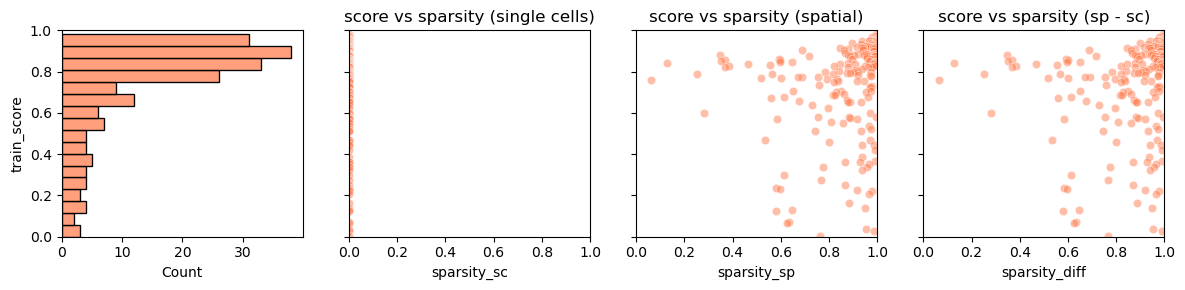

In [43]:
tg.plot_training_scores(ad_map, bins=20, alpha=.5)

In [42]:
ad_map.uns['train_genes_df']

train_score  sparsity_sc  sparsity_sp  sparsity_diff
ccr7        0.980798          0.0     0.993941       0.993941
ms4a1       0.970665          0.0     0.994639       0.994639
lhx8        0.970151          0.0     0.993903       0.993903
ngp         0.968766          0.0     0.976274       0.976274
s100a8      0.962898          0.0     0.993205       0.993205
...              ...          ...          ...            ...
sult1e1     0.027954          0.0     0.987599       0.987599
myo6        0.001235          0.0     0.764383       0.764383
pgr        -0.052402          0.0     0.992054       0.992054
inhba      -0.077057          0.0     0.931540       0.931540
inha       -0.176352          0.0     0.398018       0.398018

[198 rows x 4 columns]